# Feature Selection

In [20]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [110]:
# Read datset
df = pd.read_csv('../data/solar.csv')

# DataSet without cero values
mask = ( df['GHI'] != 0 )
df_nocero = df[mask]

# Separation of features and target
Y = df[['GHI', 'DNI', 'DHI']]
X = df.drop(['GHI', 'DNI', 'DHI'], axis=1)
Y_nocero = df_nocero[['GHI', 'DNI', 'DHI']]
X_nocero = df_nocero.drop(['GHI', 'DNI', 'DHI'], axis=1)

In [111]:
# Remove all the no util variables

X.drop(['TimeUtc', 'TimeZone', 'LocalTime', 'Year'], axis=1, inplace=True)
X_nocero.drop(['TimeUtc', 'TimeZone', 'LocalTime', 'Year'], axis=1, inplace=True)
X.head(1)

,MonthOfYear,WeekOfYear,DayOfYear,HourOfDay,Latitude,Longitude,Altitude,ApparentZenith,Zenith,ApparentElevation,Elevation,Azimuth,Temperature,Pressure,Humidity,LinkeTurbidity,PrecipitableWater,WindSpeed,WindDirection,ExtraRadiation
0,12,53,365,18,18.0,-100.0,787.0,87.288419,87.508232,2.711581,2.491768,244.795929,24.24,92229.0,56.84,3.675,2.726047,1.98,197.0,1413.940576


## Visualization data

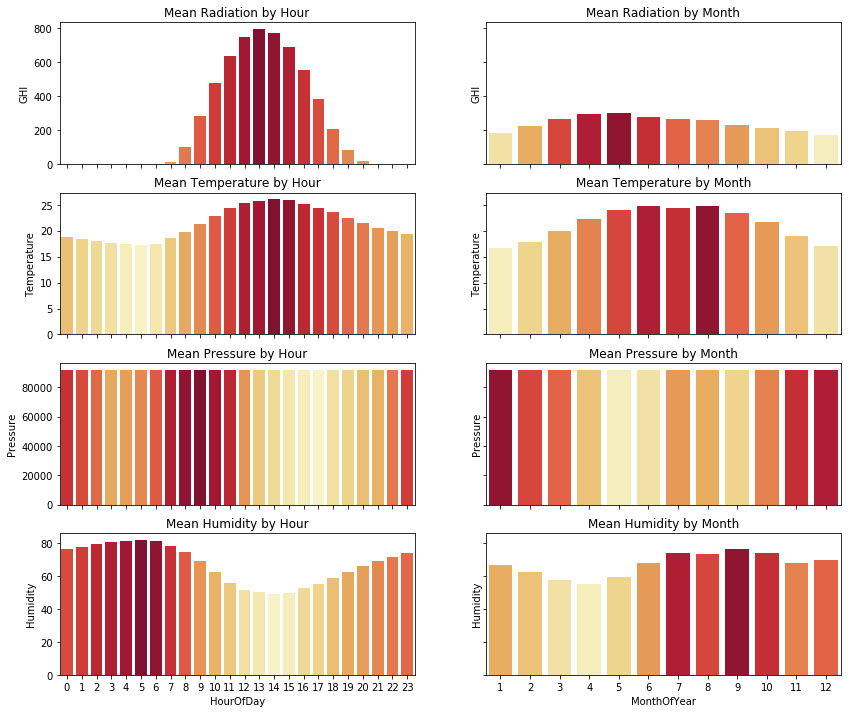

In [4]:
# Visualization for all data

import seaborn as sns

grouped_m=df.groupby('MonthOfYear').mean().reset_index()
grouped_w=df.groupby('WeekOfYear').mean().reset_index()
grouped_d=df.groupby('DayOfYear').mean().reset_index()
grouped_h=df.groupby('HourOfDay').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
#ax3.set_ylim(45,60)
#ax5.set_ylim(30.36,30.46)
#ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['GHI'].argsort().argsort() 
g = sns.barplot(x="HourOfDay", y='GHI', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['GHI'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='GHI', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="HourOfDay", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="HourOfDay", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="HourOfDay", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

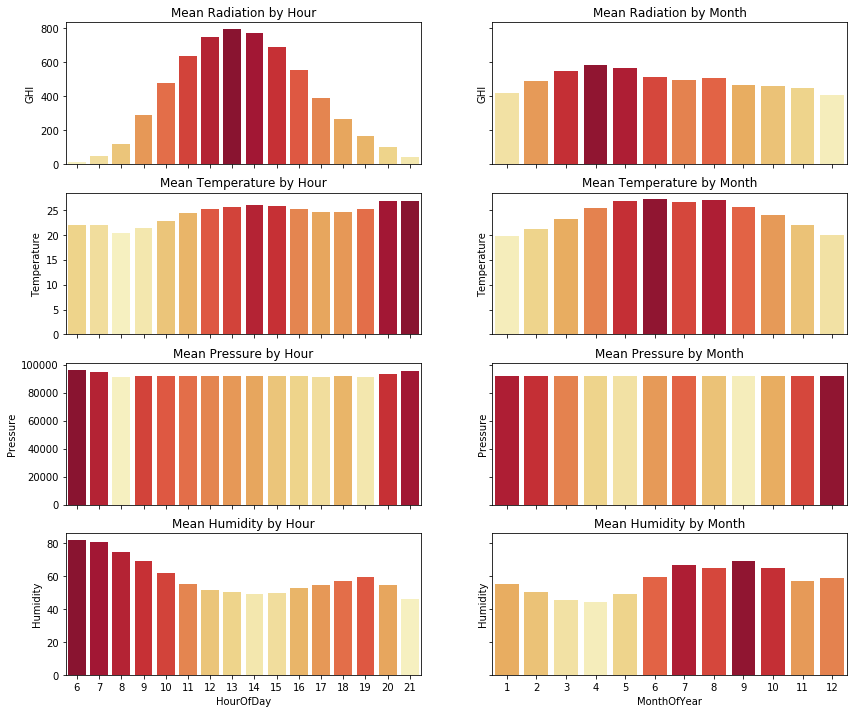

In [6]:
# Visualization for no cero data

import seaborn as sns

grouped_m = df_nocero.groupby('MonthOfYear').mean().reset_index()
grouped_w = df_nocero.groupby('WeekOfYear').mean().reset_index()
grouped_d = df_nocero.groupby('DayOfYear').mean().reset_index()
grouped_h = df_nocero.groupby('HourOfDay').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
#ax3.set_ylim(45,60)
#ax5.set_ylim(30.36,30.46)
#ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['GHI'].argsort().argsort() 
g = sns.barplot(x="HourOfDay", y='GHI', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['GHI'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='GHI', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="HourOfDay", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="HourOfDay", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="HourOfDay", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

## Correlation

In [5]:
# Pearson correlation

corr_all = X.drop(['MonthOfYear', 'WeekOfYear'], axis=1)
corr_all['DHI'] = Y['GHI'] 

corr_nocero = X_nocero.drop(['MonthOfYear', 'WeekOfYear'], axis=1)
corr_nocero['DHI'] = Y_nocero['GHI'] 

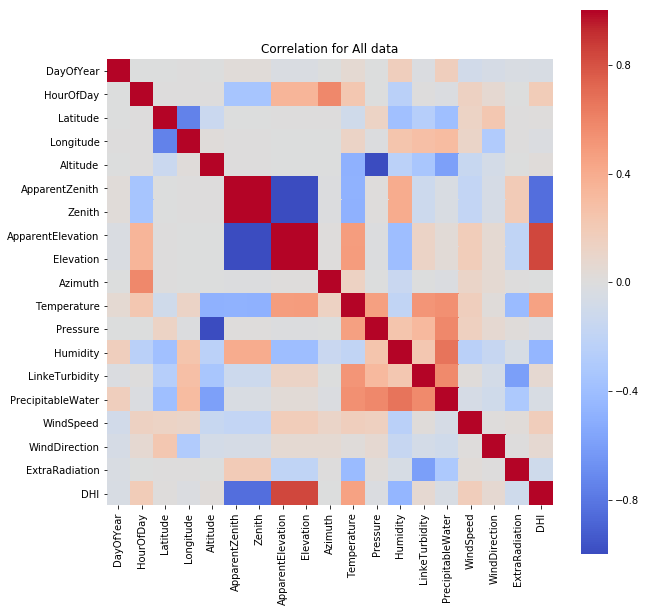

In [7]:
plt.rcParams['figure.figsize'] = [10,10]
sns.heatmap(corr_all.corr(), square=True, cmap='coolwarm')
plt.title('Correlation for All data');

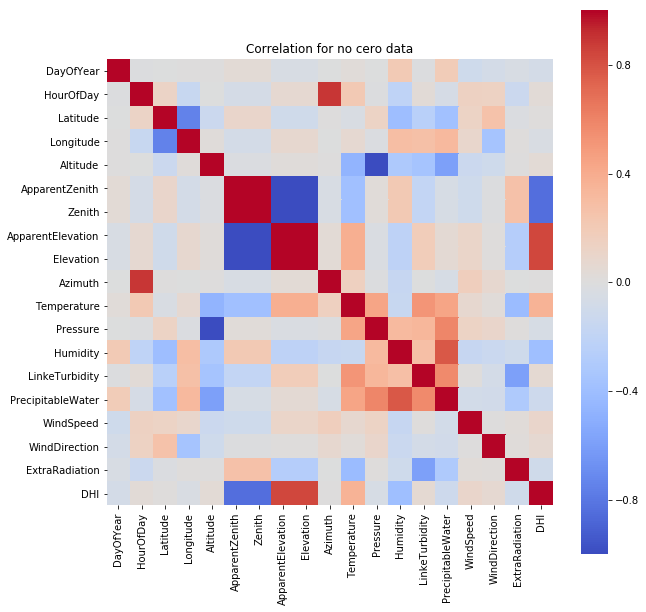

In [8]:
plt.rcParams['figure.figsize'] = [10,10]
sns.heatmap(corr_nocero.corr(), square=True, cmap='coolwarm')
plt.title('Correlation for no cero data');

In [9]:
corr_all.corr().DHI

DayOfYear           -0.043092
HourOfDay            0.193254
Latitude             0.009272
Longitude           -0.022332
Altitude             0.016276
ApparentZenith      -0.840619
Zenith              -0.840875
ApparentElevation    0.840619
Elevation            0.840875
Azimuth             -0.001738
Temperature          0.457306
Pressure            -0.023403
Humidity            -0.454882
LinkeTurbidity       0.063624
PrecipitableWater   -0.045840
WindSpeed            0.175379
WindDirection        0.068020
ExtraRadiation      -0.103634
DHI                  1.000000
Name: DHI, dtype: float64

In [10]:
corr_nocero.corr().DHI

DayOfYear           -0.075783
HourOfDay            0.037959
Latitude             0.008888
Longitude           -0.038142
Altitude             0.045253
ApparentZenith      -0.840740
Zenith              -0.840841
ApparentElevation    0.840740
Elevation            0.840841
Azimuth              0.005865
Temperature          0.365581
Pressure            -0.052219
Humidity            -0.394698
LinkeTurbidity       0.056341
PrecipitableWater   -0.112864
WindSpeed            0.099376
WindDirection        0.063148
ExtraRadiation      -0.098322
DHI                  1.000000
Name: DHI, dtype: float64

### First conclusions:
* Both dataset have similar behaivor
* The best corralated features are:
    - Zenith or Elevation (Inverse proporcionality)
    - Temperature
    - Humidity
    - WindSpeed
    - ExtraRadiation
    - HourOfYear
    - PrecipitableWater (Got by empirical equation (20% error))
    - Linke Turbidity
    - Pressure 
* The less corralated feature is:
    - Latitude

## Feature importance 

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# All data
X_all = X.drop(['MonthOfYear', 'WeekOfYear'], axis=1)
y_all = Y['GHI']

# No cero data
X_nocero = X_nocero.drop(['MonthOfYear', 'WeekOfYear'], axis=1)
y_nocero = Y_nocero['GHI']

Xall_train, Xall_test, yall_train, yall_test = train_test_split(X_all, y_all, random_state=1)
Xnocero_train, Xnocero_test, ynocero_train, ynocero_test = train_test_split(X_nocero, y_nocero, random_state=1)

In [15]:
# Models
linear = Lasso(alpha=0.5, max_iter=2000)
rfr = RandomForestRegressor(max_depth=20)

# Train
all_linear  = linear.fit(Xall_train, yall_train);
all_rfr = rfr.fit(Xall_train, yall_train);
nocero_linear  = linear.fit(Xnocero_train, ynocero_train);
nocero_rfr = rfr.fit(Xnocero_train, ynocero_train);

C:\Users\emanu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\emanu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [19]:
# Cross validate Funcion
def _get_cross_validate(model, X, y, scoring='r2', train=True):
    from sklearn.model_selection import cross_validate
    results = cross_validate(model, X, y, scoring=scoring, return_train_score=train)
    train_score = results['train_score']
    test_score = results['test_score']
    return np.mean(train_score), np.mean(test_score)

In [21]:
# Score for All data
tr_l_a, te_l_a = _get_cross_validate(linear, X_all, y_all) 
tr_r_a, te_r_a = _get_cross_validate(rfr, X_all, y_all) 

# Score for no cero data
tr_l_n, te_l_n = _get_cross_validate(linear, X_nocero, y_nocero) 
tr_r_n, te_r_n = _get_cross_validate(rfr, X_nocero, y_nocero) 

print(f'''  __ SCORES __

ALL-DATA
 * Linear: {tr_l_a, te_l_a}
 * RFR   : {tr_r_a, te_r_a}

NO-CERO-VALUES
 * Linear: {tr_l_n, te_l_n}
 * RFR   : {tr_r_n, te_r_n}''')

__ SCORES __

ALL-DATA
 * Linear: (0.7601004114574165, 0.755490250809732)
 * RFR   : (0.980664662703445, 0.9024297748884509)

NO-CERO-VALUES
 * Linear: (0.7788162155232788, 0.7708622398181403)
 * RFR   : (0.9558953403097717, 0.7725252089974081)


### Second conlusions:
* The cross validation for train set in all models is very similar
* The cross validation for test model shows overfitting in the case of RFR with the no cero values
* The performance of the models is better with all values.

**The chose dataset is: All data values**

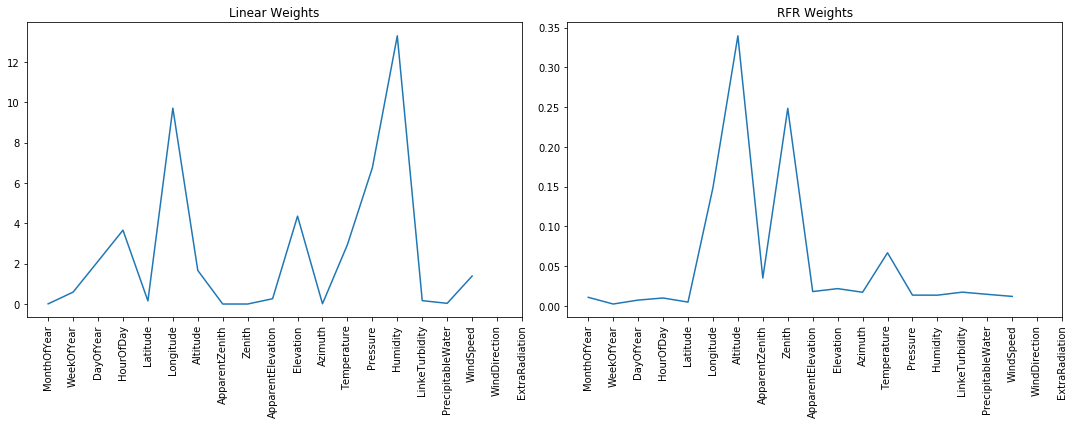

In [25]:
# Get wights
linear = all_linear
rfr = all_rfr
wights_lin = np.abs(linear.coef_)
wights_rfr = np.abs(rfr.feature_importances_)

# Visualization
plt.rcParams['figure.figsize'] = [15,6]
cols = X.columns
plt.subplot(1,2,1)
plt.plot(wights_lin)
plt.title('Linear Weights')
plt.tight_layout()
plt.xticks(np.arange(len(cols)), labels=cols, rotation='vertical')

plt.rcParams['figure.figsize'] = [15,6]
plt.subplot(1,2,2)
plt.plot(wights_rfr)
plt.title('RFR Weights')
plt.tight_layout()
plt.xticks(np.arange(len(cols)), labels=cols, rotation='vertical');

### Third conclusions:
* In both cases the wind direction and the extra radiation doesn't have importance for the predictio.
* Deppending on the model the best solar position prediction change:
    - For linear model: Is better the Elevation than zenith
    - For rfr model: Is better the Zenith tha Elevation.
    - But for both models the best estimators are the true values and not the apparent values, the same results it can be observed in the Pearson's correlation  


In [113]:
# New dataset
# Remove the not importance feature.
X = X.drop(['WindDirection', 'ExtraRadiation', 'ApparentElevation', 'ApparentZenith'],
           axis=1)
y = Y['GHI']

In [114]:
X.head(1)

,MonthOfYear,WeekOfYear,DayOfYear,HourOfDay,Latitude,Longitude,Altitude,Zenith,Elevation,Azimuth,Temperature,Pressure,Humidity,LinkeTurbidity,PrecipitableWater,WindSpeed
0,12,53,365,18,18.0,-100.0,787.0,87.508232,2.491768,244.795929,24.24,92229.0,56.84,3.675,2.726047,1.98


In [45]:
# New train
linear = Lasso(alpha=0.5, max_iter=2000)
RfR = RandomForestRegressor(max_depth=20)

lin = linear.fit(X, y)
rfr = RfR.fit(X, y)

In [46]:
# Score for All data
tr_l, te_l = _get_cross_validate(lin, X, y) 
tr_r, te_r = _get_cross_validate(rfr, X, y) 

print(f'''  __ SCORES __

 * Linear: {tr_l, te_l}
 * RFR   : {tr_r, te_r}''')

__ SCORES __

 * Linear: (0.7542817943932785, 0.7492321459051109)
 * RFR   : (0.9800859491125813, 0.9016424165089726)


The score is a little lower than the case for all variables, but no very representative

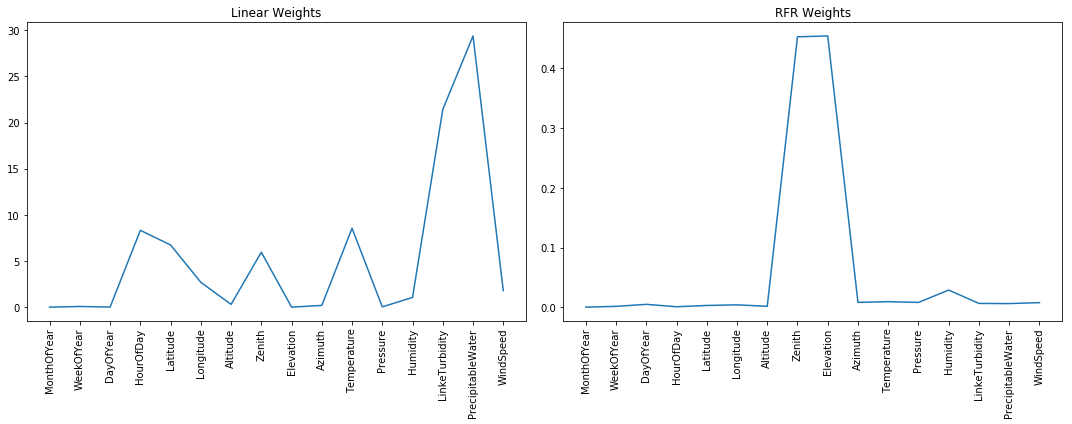

In [47]:
wights_lin = np.abs(linear.coef_)
wights_rfr = np.abs(rfr.feature_importances_)

# Visualization
plt.rcParams['figure.figsize'] = [15,6]
cols = X.columns
plt.subplot(1,2,1)
plt.plot(wights_lin)
plt.title('Linear Weights')
plt.tight_layout()
plt.xticks(np.arange(len(cols)), labels=cols, rotation='vertical')

plt.rcParams['figure.figsize'] = [15,6]
plt.subplot(1,2,2)
plt.plot(wights_rfr)
plt.title('RFR Weights')
plt.tight_layout()
plt.xticks(np.arange(len(cols)), labels=cols, rotation='vertical');

Important feature still being the Zenith and Elevation, but these variables are reciprocal.
* For both model, the best estimator is the Elevation

In [115]:
X = X.drop('Zenith', axis=1)

In [53]:
# New train
linear = Lasso(alpha=0.5, max_iter=2000)
RfR = RandomForestRegressor(max_depth=20)

lin = linear.fit(X, y)
rfr = RfR.fit(X, y)

# Score for All data
tr_l, te_l = _get_cross_validate(lin, X, y) 
tr_r, te_r = _get_cross_validate(rfr, X, y) 

print(f'''  __ SCORES __

 * Linear: {tr_l, te_l}
 * RFR   : {tr_r, te_r}''')

__ SCORES __

 * Linear: (0.7542817943932785, 0.7492321459051109)
 * RFR   : (0.9801559060144175, 0.9027422929147111)


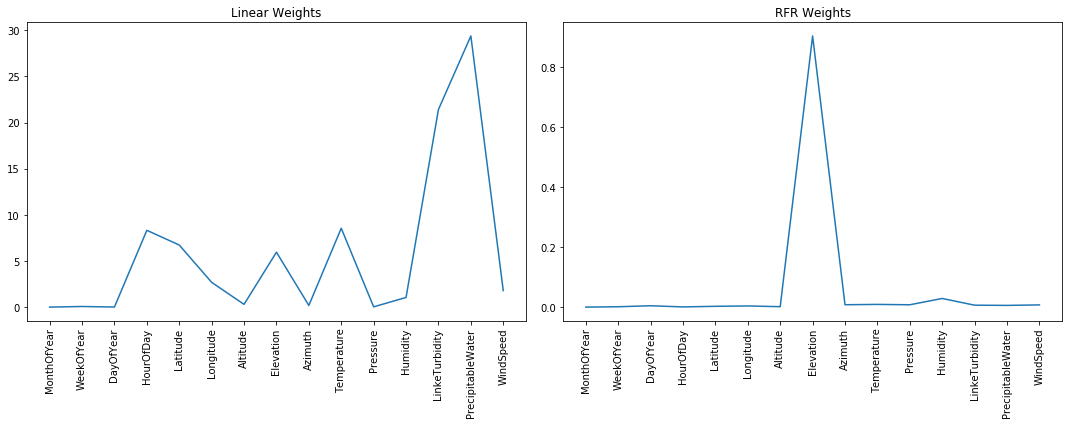

In [77]:
wights_lin = np.abs(linear.coef_)
wights_rfr = np.abs(rfr.feature_importances_)

# Visualization
plt.rcParams['figure.figsize'] = [15,6]
cols = X.columns
plt.subplot(1,2,1)
plt.plot(wights_lin)
plt.title('Linear Weights')
plt.tight_layout()
plt.xticks(np.arange(len(cols)), labels=cols, rotation='vertical')

plt.rcParams['figure.figsize'] = [15,6]
plt.subplot(1,2,2)
plt.plot(wights_rfr)
plt.title('RFR Weights')
plt.tight_layout()
plt.xticks(np.arange(len(cols)), labels=cols, rotation='vertical');

In [88]:
weights = pd.DataFrame(wights_lin/wights_lin.max(), index=X.columns, columns=['Linear'])
weights['RFR'] = wights_rfr
weights['Average'] = (wights_rfr + weights.Linear.values) / 2
weights.sort_values(by=['Average'], ascending=False)

,Linear,RFR,Average
Elevation,0.202515,0.905122,0.553818
PrecipitableWater,1.000000,0.006271,0.503136
LinkeTurbidity,0.728768,0.006993,0.367880
Temperature,0.290833,0.009582,0.150208
HourOfDay,0.283242,0.001192,0.142217
Latitude,0.229022,0.003196,0.116109
Longitude,0.091402,0.004395,0.047899
WindSpeed,0.060898,0.007881,0.034390
Humidity,0.035696,0.029360,0.032528
Azimuth,0.006192,0.008427,0.007310


In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

linear = Lasso(alpha=0.5, max_iter=2000)
RfR = RandomForestRegressor(max_depth=20)

lin_ = make_pipeline(PolynomialFeatures(2), linear)
rfr_ = make_pipeline(PolynomialFeatures(2), RfR)

In [92]:
lin = lin_.fit(X, y);
rfr = rfr_.fit(X, y);

In [93]:
# Score for All data
tr_l, te_l = _get_cross_validate(lin, X, y) 
tr_r, te_r = _get_cross_validate(rfr, X, y) 

print(f'''  __ SCORES __

 * Linear: {tr_l, te_l}
 * RFR   : {tr_r, te_r}''')

__ SCORES __

 * Linear: (0.8875716222102694, 0.8798428754620088)
 * RFR   : (0.9773288023388093, 0.8979944021062898)


In [102]:
wights_lin = np.abs(linear.coef_)
wights_rfr = np.abs(RfR.feature_importances_)

poly = PolynomialFeatures(2)
poly.fit(X,y)
cols = poly.get_feature_names()

# Visualization
weights = pd.DataFrame(wights_lin/wights_lin.max(), index=cols, columns=['Linear'])
weights['RFR'] = wights_rfr
weights['Average'] = (wights_rfr + weights.Linear.values) / 2
weights.sort_values(by=['Linear'], ascending=False)

,Linear,RFR,Average
x7,1.000000e+00,0.002227,0.501113
x12^2,7.739048e-01,0.000363,0.387134
x9 x13,2.986624e-01,0.000550,0.149606
x11,2.805769e-01,0.001347,0.140962
x5 x12,1.332202e-01,0.000905,0.067062
x5 x13,9.013596e-02,0.000392,0.045264
x3^2,7.933836e-02,0.000135,0.039737
x7 x12,6.956527e-02,0.000809,0.035187
x3 x13,5.733050e-02,0.000560,0.028945
x12 x14,5.113981e-02,0.000567,0.025853


### The unique important variables are:
* Longitude*Elevation
* LinkeTurbidity^2
* Temperature*PrecipitableWater
* Longitude*LinkeTurbidity
* Longitude*PrecipitableWater

In [116]:
X_ = X
X_['Longitud*Elevation'] = X.Longitude.values * X.Elevation.values
X_['LinkeTurbidity^2'] = X.LinkeTurbidity.values ** 2 
X_['Temperature*PrecipitableWater'] = X.Temperature.values * X.PrecipitableWater.values
X_['Longitud*LinkeTurbidity'] = X.Longitude.values * X.LinkeTurbidity.values
X_['Longitud*PrecipitableWater'] = X.Longitude.values * X.PrecipitableWater.values

In [104]:
# New train
linear = Lasso(alpha=0.5, max_iter=2000)
RfR = RandomForestRegressor(max_depth=20)

lin = linear.fit(X_, y)
rfr = RfR.fit(X_, y)

# Score for All data
tr_l, te_l = _get_cross_validate(lin, X_, y) 
tr_r, te_r = _get_cross_validate(rfr, X_, y) 

print(f'''  __ SCORES __

 * Linear: {tr_l, te_l}
 * RFR   : {tr_r, te_r}''')

__ SCORES __

 * Linear: (0.7640630761152893, 0.7582045969693295)
 * RFR   : (0.9791516044546021, 0.9022342994056163)


**The best data are the original data**

In [118]:
X = X.drop(['MonthOfYear',	'WeekOfYear', 'DayOfYear', 'LinkeTurbidity^2',
	        'Temperature*PrecipitableWater', 'Longitud*LinkeTurbidity', 'Longitud*PrecipitableWater'],
             axis=1)

In [119]:
X.head()

,HourOfDay,Latitude,Longitude,Altitude,Elevation,Azimuth,Temperature,Pressure,Humidity,LinkeTurbidity,PrecipitableWater,WindSpeed,Longitud*Elevation
0,18,18.0,-100.0,787.0,2.491768,244.795929,24.240000,92229.0,56.840000,3.675,2.726047,1.98,-249.176763
1,19,18.0,-100.0,787.0,-10.634358,249.057403,23.860001,92304.0,59.779999,3.675,2.804144,2.05,1063.435820
2,20,18.0,-100.0,787.0,-24.093706,252.233679,23.469999,92380.0,62.730000,3.675,2.876138,2.13,2409.370633
3,21,18.0,-100.0,787.0,-37.760150,254.432832,23.090000,92423.0,65.669998,3.675,2.944591,2.21,3776.014999
4,22,18.0,-100.0,787.0,-51.537857,255.412504,22.709999,92465.0,68.610001,3.675,3.008491,2.29,5153.785718


In [122]:
Z = pd.concat([X,y], axis=1)
Z_corr = Z.corr().GHI
Z_corr.sort_values()

Longitud*Elevation   -0.842744
Humidity             -0.454882
PrecipitableWater    -0.045840
Pressure             -0.023403
Longitude            -0.022332
Azimuth              -0.001738
Latitude              0.009272
Altitude              0.016276
LinkeTurbidity        0.063624
WindSpeed             0.175379
HourOfDay             0.193254
Temperature           0.457306
Elevation             0.840875
GHI                   1.000000
Name: GHI, dtype: float64

### Last feature selection

In [123]:
solar_cuasi = pd.concat([X,Y], axis=1)
solar_cuasi.to_csv('../data/solar_cuasi.csv', index=False, encoding='utf-8')

In [124]:
X = pd.read_csv('../data/solar_cuasi.csv')

In [127]:
y = X['GHI']
X = X.drop(['GHI', 'DNI', 'DHI'], axis=1)

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

rfr = RandomForestRegressor(max_depth=20)
rfr.fit(X_train, y_train)
feature_importances = rfr.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,7):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))

    rfr.fit(X_train_opt, y_train)
    feature_importances = rfr.feature_importances_
    scores = cross_val_score(estimator=rfr,
                             X=X_train_opt,
                             y=y_train, cv=5,
                             scoring='r2')
    r2s_opt = np.append(r2s_opt, scores.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))


feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})

,Features,r2 Score
0,"Latitude, Longitude, Altitude, Elevation, Azim...",0.922359
1,"Latitude, Longitude, Elevation, Azimuth, Tempe...",0.922244
2,"Latitude, Elevation, Azimuth, Temperature, Pre...",0.921836
3,"Elevation, Azimuth, Temperature, Pressure, Hum...",0.920608
4,"Elevation, Azimuth, Temperature, Pressure, Hum...",0.920464


In [136]:
feature_selection

,Features,r2 Score
0,"Latitude, Longitude, Altitude, Elevation, Azim...",0.922359
1,"Latitude, Longitude, Elevation, Azimuth, Tempe...",0.922244
2,"Latitude, Elevation, Azimuth, Temperature, Pre...",0.921836
3,"Elevation, Azimuth, Temperature, Pressure, Hum...",0.920608
4,"Elevation, Azimuth, Temperature, Pressure, Hum...",0.920464
5,"Elevation, Azimuth, Temperature, Pressure, Hum...",0.919272
6,"Elevation, Azimuth, Temperature, Pressure, Hum...",0.918114


In [131]:
removed_columns

,0,1,2,4,5,6,7,10,12,16,...,551804,551805,551807,551808,551810,551811,551812,551813,551814,551816
HourOfDay,18.000000,19.000000,20.000000,22.000000,23.000000,0.000000,1.000000,4.000000,6.000000,10.000000,...,4.000000,5.000000,7.000000,8.000000,10.000000,11.000000,12.000000,13.000000,14.000000,16.000000
Altitude,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,...,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
Longitude,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,...,-98.230103,-98.230103,-98.230103,-98.230103,-98.230103,-98.230103,-98.230103,-98.230103,-98.230103,-98.230103
Latitude,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,19.322260,19.322260,19.322260,19.322260,19.322260,19.322260,19.322260,19.322260,19.322260,19.322260
PrecipitableWater,2.726047,2.804144,2.876138,3.008491,3.068424,3.121828,3.173354,3.372263,3.381239,2.818318,...,1.355914,1.344802,1.559633,1.671149,1.457924,1.514183,1.562505,1.600935,1.632460,1.673535
LinkeTurbidity,3.675000,3.675000,3.675000,3.675000,3.675000,3.695968,3.695968,3.695968,3.695968,3.695968,...,3.050000,3.050000,3.050000,3.050000,3.050000,3.050000,3.050000,3.050000,3.050000,3.050000
WindSpeed,1.980000,2.050000,2.130000,2.290000,2.360000,2.440000,2.520000,0.880000,0.890000,3.830000,...,0.930000,1.080000,1.090000,1.090000,2.120000,2.150000,2.170000,2.200000,2.220000,2.270000


**The first 5 removed features don't have an impact in the model performance**

In [139]:
X = X.drop(list(removed_columns.index)[:5], axis=1)
X.head(1)

,Elevation,Azimuth,Temperature,Pressure,Humidity,LinkeTurbidity,WindSpeed,Longitud*Elevation
0,2.491768,244.795929,24.24,92229.0,56.84,3.675,1.98,-249.176763


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

rfr = RandomForestRegressor(max_depth=20)
rfr.fit(X_train, y_train)
feature_importances = rfr.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,6):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))

    rfr.fit(X_train_opt, y_train)
    feature_importances = rfr.feature_importances_
    scores = cross_val_score(estimator=rfr,
                             X=X_train_opt,
                             y=y_train, cv=5,
                             scoring='r2')
    r2s_opt = np.append(r2s_opt, scores.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))


feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection

,Features,r2 Score
0,"Elevation, Azimuth, Temperature, Pressure, Hum...",0.919191
1,"Elevation, Azimuth, Temperature, Pressure, Hum...",0.918085
2,"Elevation, Temperature, Pressure, Humidity, Lo...",0.913935
3,"Elevation, Pressure, Humidity, Longitud*Elevation",0.909777
4,"Pressure, Humidity, Longitud*Elevation",0.905963
5,"Humidity, Longitud*Elevation",0.897677


In [142]:
final_dataset = X.drop('LinkeTurbidity', axis=1)

In [143]:
final_dataset = pd.concat([final_dataset, y], axis=1)

In [144]:
final_dataset.head(1)

,Elevation,Azimuth,Temperature,Pressure,Humidity,WindSpeed,Longitud*Elevation,GHI
0,2.491768,244.795929,24.24,92229.0,56.84,1.98,-249.176763,0.0


In [145]:
final_dataset.to_csv('../data/ghi.csv', index=False, encoding='utf-8')